Cancer Cell Data Analysis (Insight Discovery, Stakeholder Recommendations, Predictive Model Construction for Cell Type Classification)

Data Description

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv('Cancer_Data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Above, the dataframe types have already been converted to floating-point numbers.

1) id - Patient ID. (Essentially useless information for us, we won't need it)

2) diagnosis

M = malignant (later represented as 1)
B = benign (later represented as 0)
For each cell nucleus, ten real-valued features are computed:

    a) radius (mean of distances from the center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

Each feature is computed three times, corresponding to the following metrics:

    a) mean - mean value for each patient's observations
    b) standard error - standard error of the mean for each patient's observations
    c) worst - worst (largest or most severe) value for each patient's observations

The dataset contains 569 rows and 33 columns.


In [ ]:
data = data.drop_duplicates()

*Let's remove duplicate data from the dataset (if any).*

*Next, let's drop the last column as it is empty. We'll also drop the first column since it doesn't contain any useful information for us. Additionally, let's display all the columns in the dataframe. Since there are quite a few, pandas compresses them and doesn't display some in the middle.*

In [ ]:
data = data.iloc[: , :-1]
data = data.iloc[: , 1:]
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


*Let's count the number of cells in both classes.*

In [ ]:
count = data.groupby(['diagnosis'])['diagnosis'].count()
count

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

*The dataset contains 357 benign cells and 212 malignant cells.*

In [ ]:
data_new = data.replace({'B': 0, 'M': 1})

*Let's replace the values B and M with 0 and 1, respectively. This will simplify the use of categorical data in classification models.*

*General information about the dataset:*

In [ ]:
data_new.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*Let's visualize the null values:*

In [ ]:
nans_ = data
nans = nans_.replace({0: np.NaN})

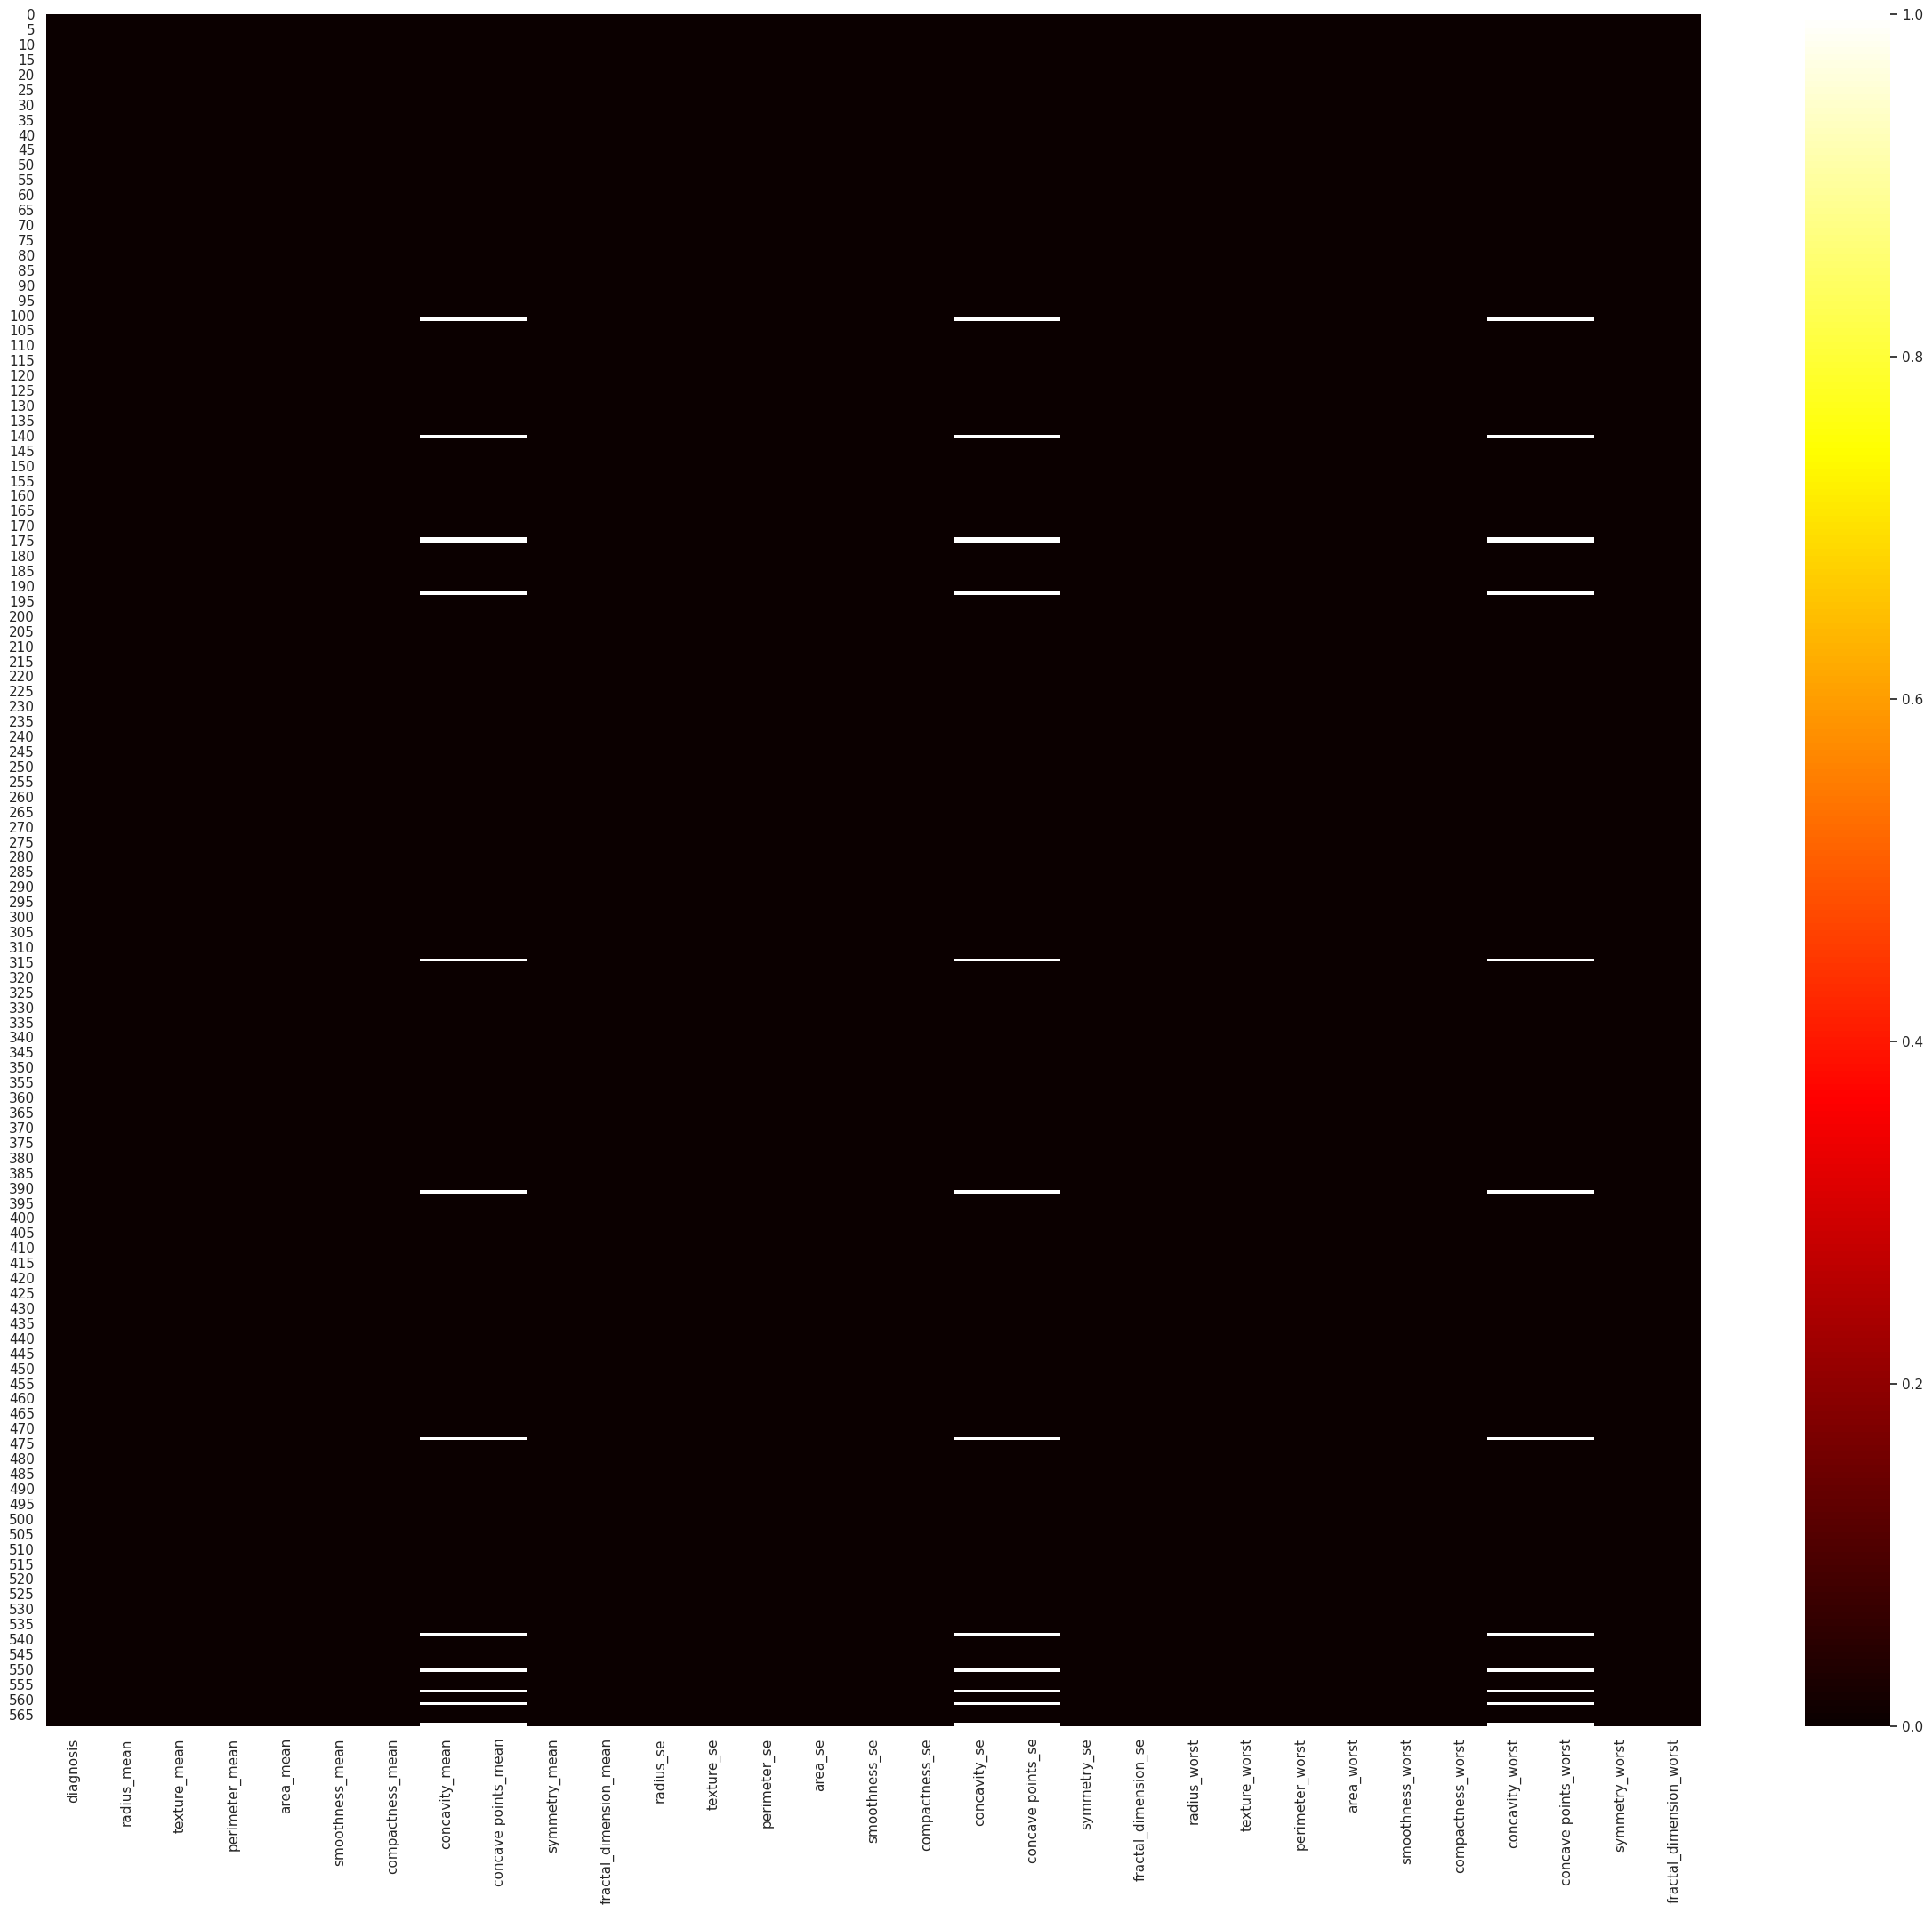

In [ ]:
sns.heatmap(nans.isnull(), cmap='hot')
plt.show()

In [ ]:
ab_nan = nans[nans.isna().any(axis=1)]
ab_nan

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,NaN,NaN,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,NaN,NaN,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,NaN,NaN,0.2932,0.09382
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,NaN,NaN,0.1903,0.06422,0.1988,0.4960,1.218,12.260,0.006040,0.005656,NaN,NaN,0.02277,0.003220,10.620,14.10,66.53,342.9,0.12340,0.07204,NaN,NaN,0.3105,0.08151
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,NaN,NaN,0.1928,0.05975,0.3309,1.9250,2.155,21.980,0.008713,0.010170,NaN,NaN,0.03265,0.001002,11.540,19.20,73.20,408.3,0.10760,0.06791,NaN,NaN,0.2710,0.06164
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,NaN,NaN,0.1722,0.06724,0.2204,0.7873,1.435,11.360,0.009172,0.008007,NaN,NaN,0.02711,0.003399,9.262,17.04,58.36,259.2,0.11620,0.07057,NaN,NaN,0.2592,0.07848
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,NaN,NaN,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,NaN,NaN,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,NaN,NaN,0.1909,0.06559
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,NaN,NaN,0.2163,0.07359,0.3368,2.7770,2.222,17.810,0.020750,0.014030,NaN,NaN,0.06146,0.006820,8.952,22.44,56.65,240.1,0.13470,0.07767,NaN,NaN,0.3142,0.08116
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,NaN,NaN,0.1985,0.07098,0.5169,2.0790,3.167,28.850,0.015820,0.019660,NaN,NaN,0.01865,0.006736,10.170,22.80,64.01,317.0,0.14600,0.13100,NaN,NaN,0.2445,0.08865
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,NaN,NaN,0.1701,0.05960,0.4455,3.6470,2.884,35.130,0.007339,0.008243,NaN,NaN,0.03141,0.003136,13.450,38.05,85.08,558.9,0.09422,0.05213,NaN,NaN,0.2409,0.06743
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,NaN,NaN,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,NaN,NaN,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,NaN,NaN,0.3058,0.09938
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,NaN,NaN,0.1661,0.05948,0.3163,1.3040,2.115,20.670,0.009579,0.011040,NaN,NaN,0.03004,0.002228,11.660,24.77,74.08,412.3,0.10010,0.07348,NaN,NaN,0.2458,0.06592


In [ ]:
len(ab_nan)

13

*As you can see, the null values are mainly in the 'concavity' feature, representing the concave portions of cancer cells. It can be assumed that these are areas of cells that do not have any concavity. I won't remove such data from the dataframe as their absence may affect the quality of our model.*

In [ ]:
data = data_new

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Insights and Data Visualization**

*Let's examine the dataset for possible anomalies and outliers.*

<ipython-input-24-c1e83a188a80>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


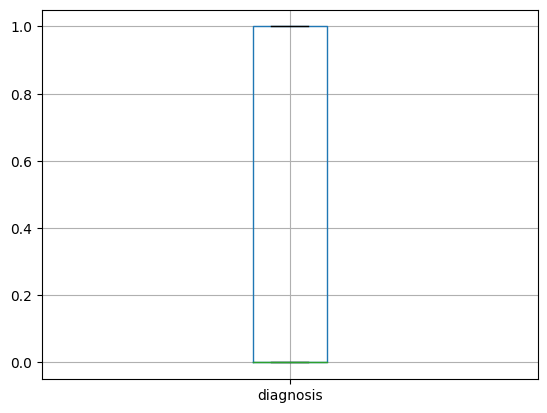

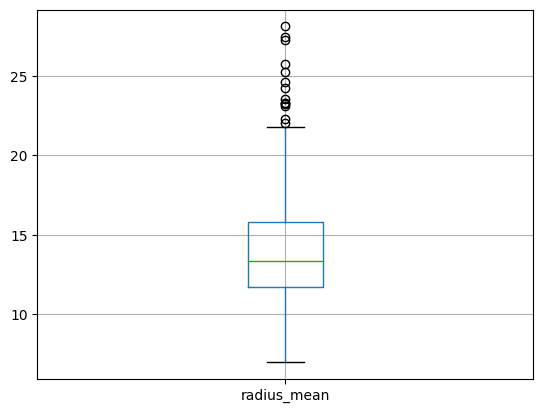

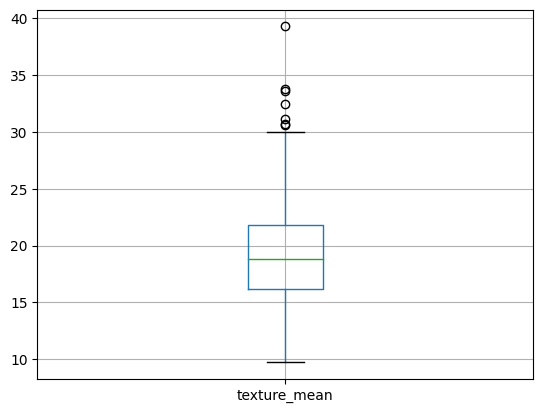

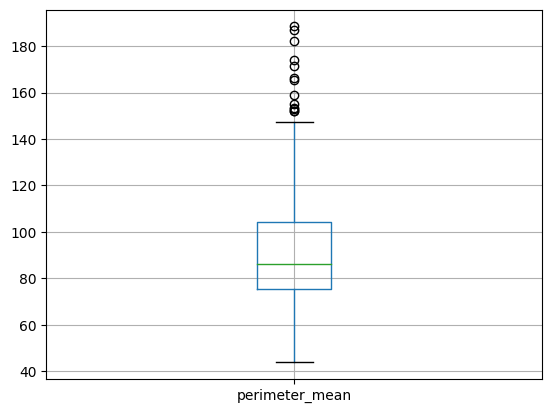

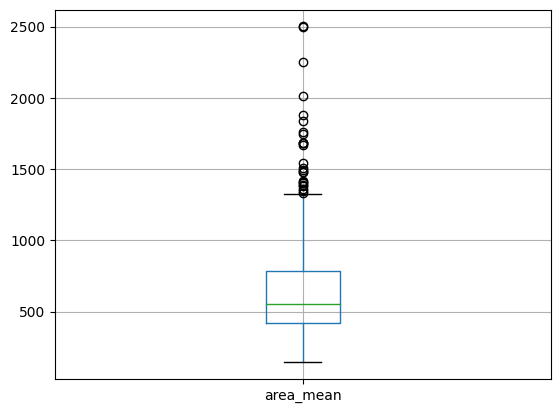

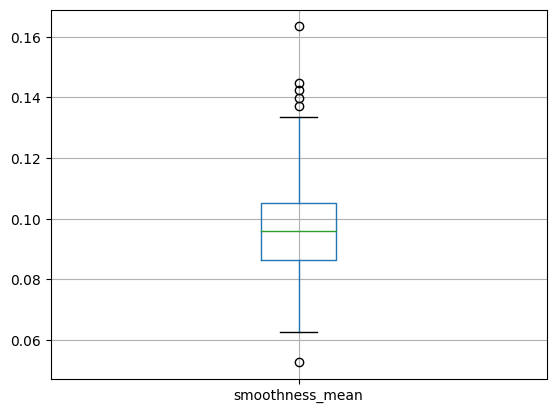

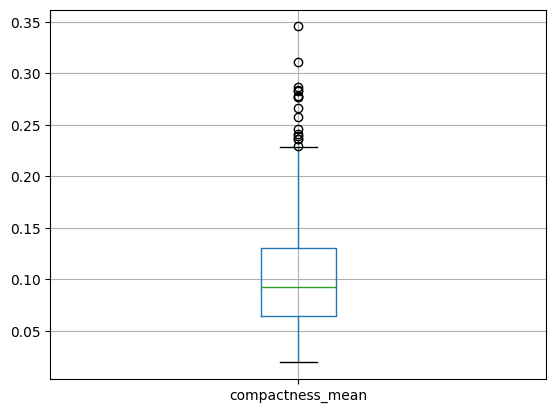

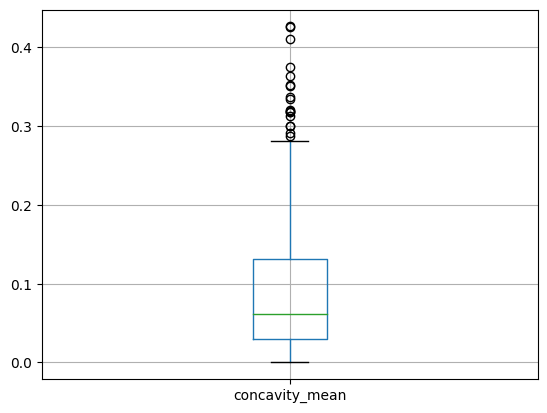

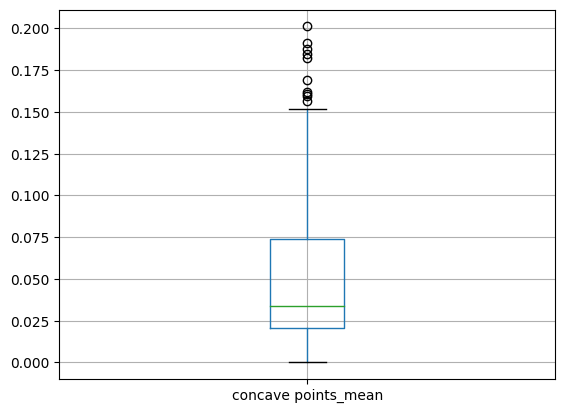

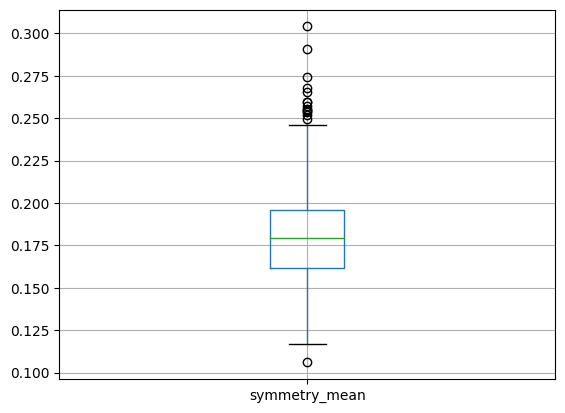

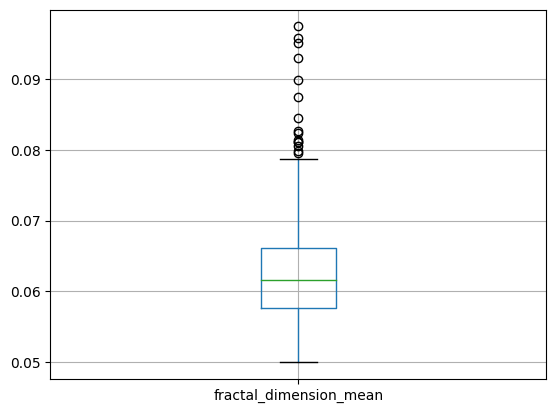

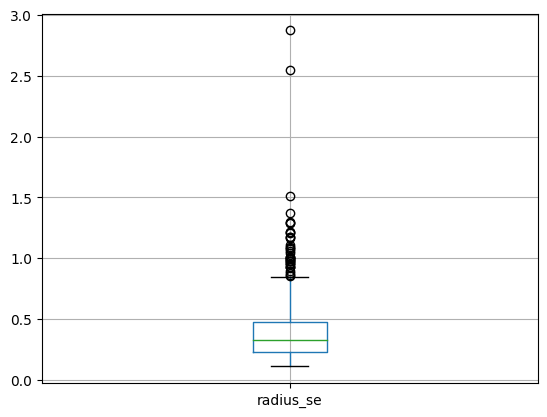

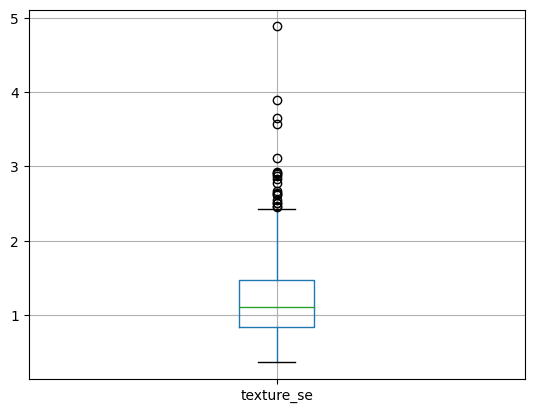

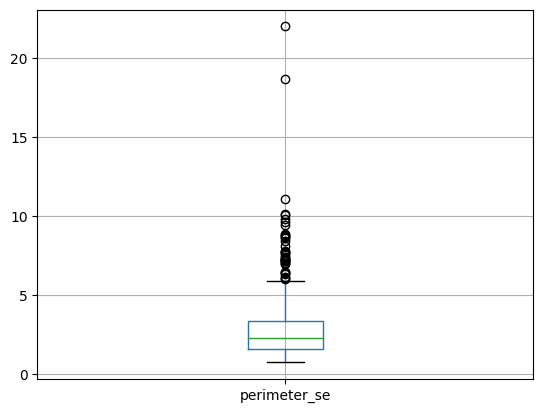

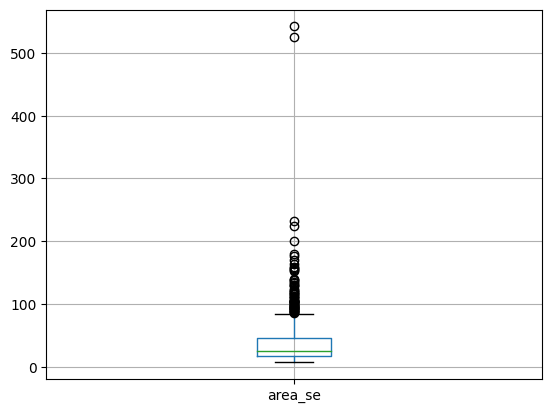

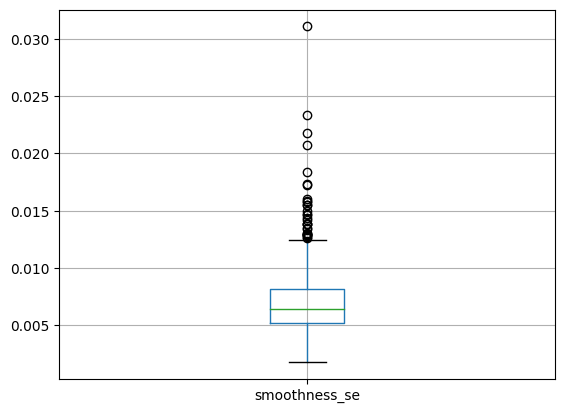

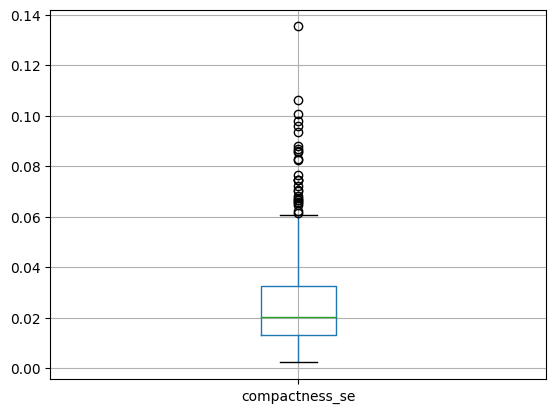

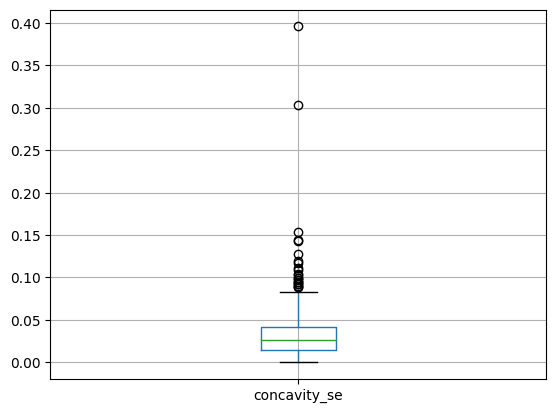

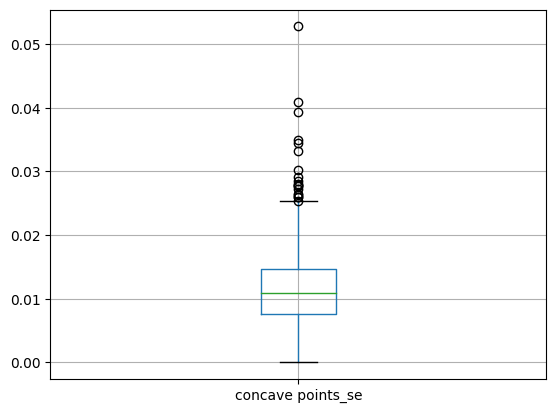

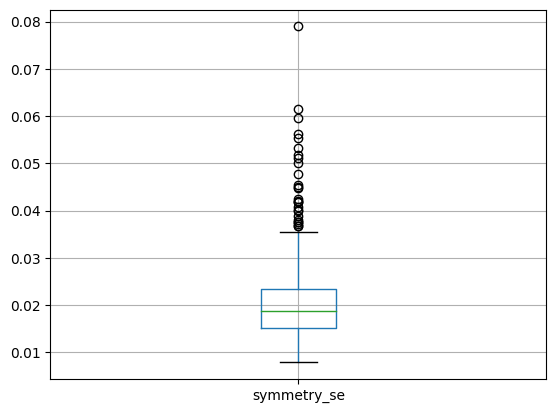

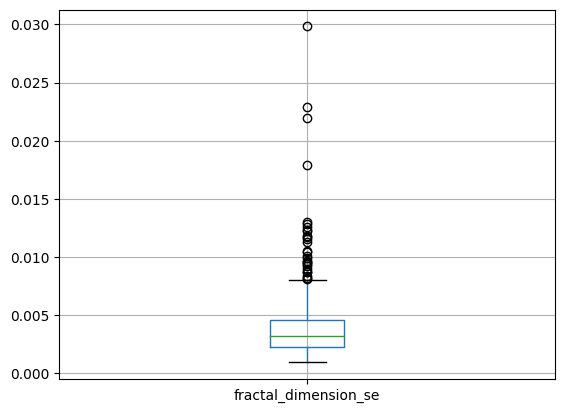

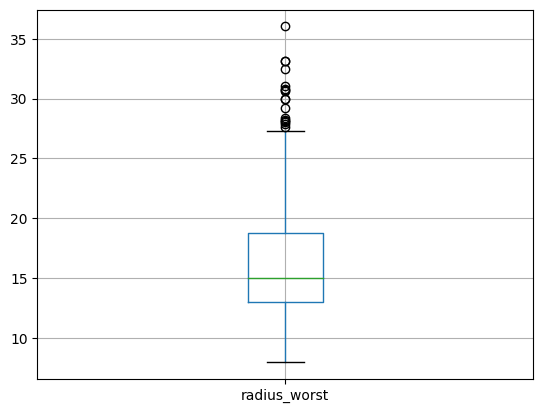

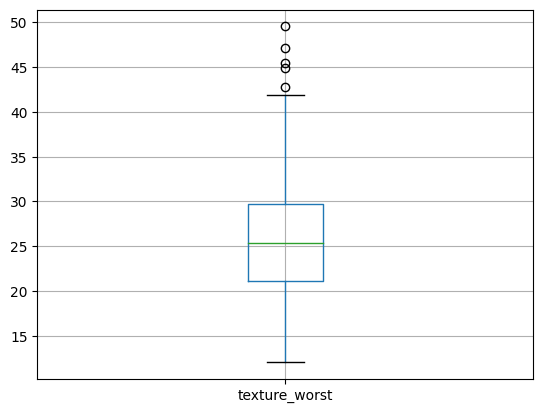

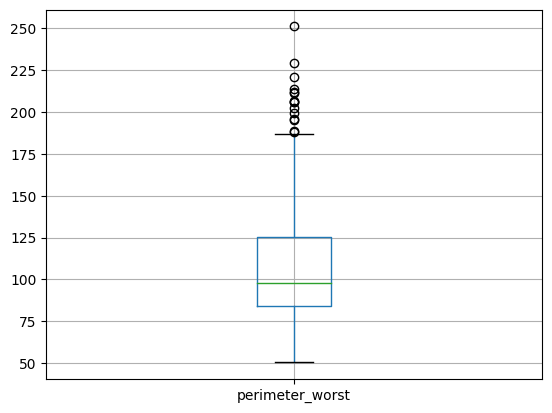

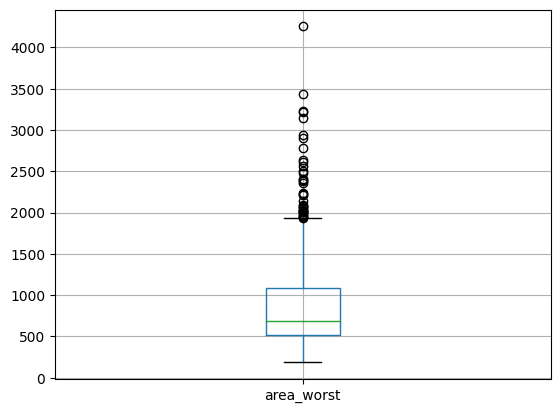

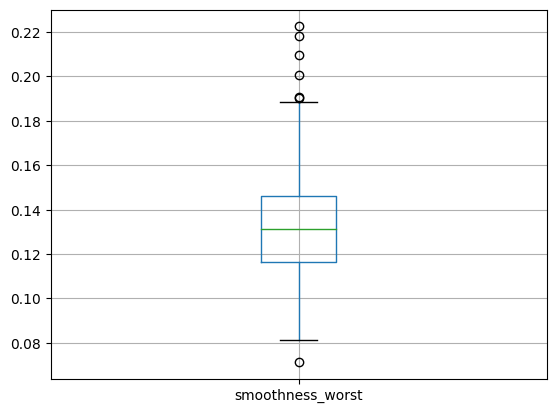

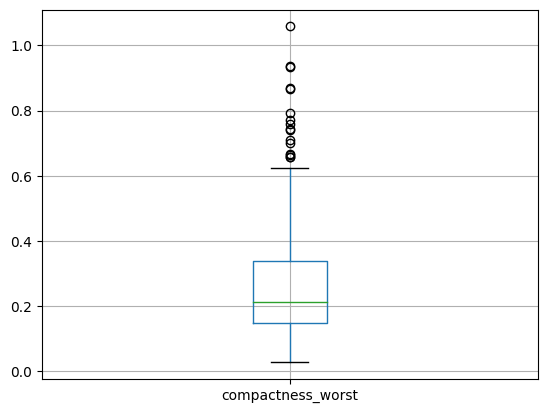

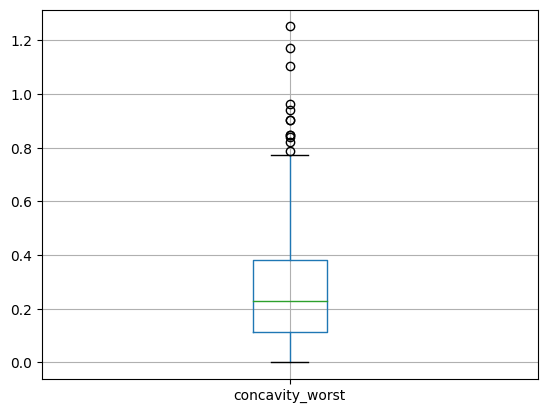

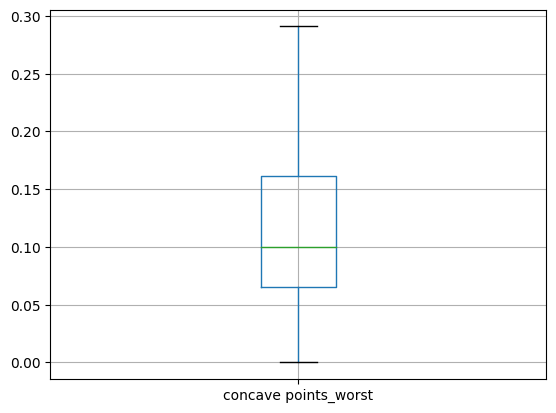

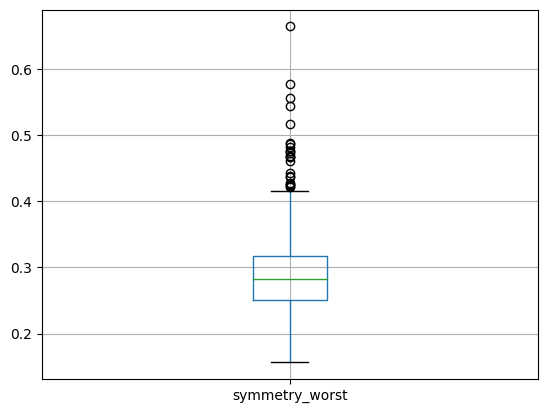

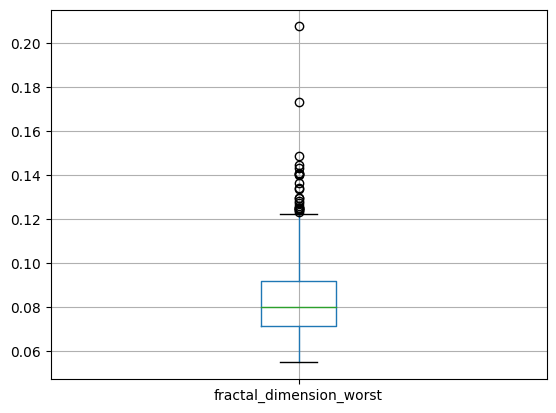

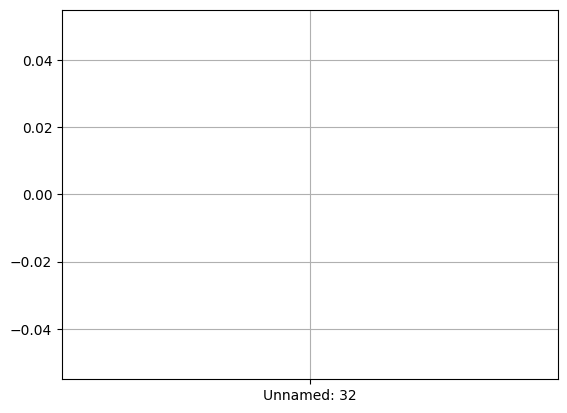

In [ ]:
data_trim = data.iloc[: , 1:]
for column in data_trim:
    plt.figure()
    data_trim.boxplot([column])

It will be more informative to divide them into classes, but anomalies and outliers are harder to discern on the graph below:

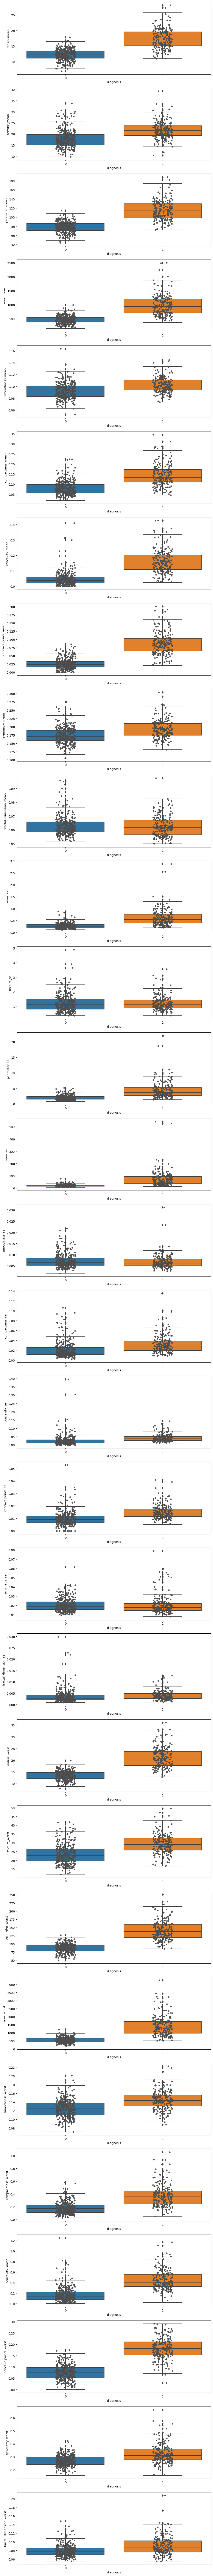

In [ ]:
data_trim = data.iloc[:, 1:]

fig, axes = plt.subplots(nrows=len(data_trim.columns), ncols=1, figsize=(10, 120))

for i, column in enumerate(data_trim.columns):
    sns.boxplot(x='diagnosis', y=column, data=data, ax=axes[i])
    sns.stripplot(x='diagnosis', y=column, data=data, jitter=True, color='.3', ax=axes[i])

plt.tight_layout()
plt.show()

It becomes clear that the class of malignant cells is slightly above the benign cells for most parameters, but there are some variations in the information on some graphs. It might be tempting to get rid of columns with approximate spreads, such as in the 'texture_se' column, but this option turned out to be not very effective.

*The boxplot shows potential anomalies in the dataset, but considering the number of rows in the dataset and the area we are studying, it can be assumed that these outliers do not have extreme values. Some values are unique, such as in the 'perimeter_se' column, where the value exceeds the mark of 20, while the mean is around 3. Such variations can be understood and interpreted since we do not know for sure at which stage of cancer the patients are. We simply do not have this information. We only have classes of cancer cells, whether they are benign or malignant; in both cases, the patient can be at any stage of cancer. Now let's look at some of these variations.*

In [ ]:
trim = data.loc[lambda row: row.area_worst > 2000]
trim.sort_values(by = 'area_worst', ascending=False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
461,911296202,1,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,0.2061,0.05623,2.5470,1.3060,18.650,542.2,0.007650,0.05374,0.08055,0.02598,0.01697,0.004558,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,NaN
265,88995002,1,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.7,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,NaN
352,899987,1,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.1,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,NaN
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.7,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,NaN
368,9011971,1,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,0.05054,1.2070,1.0510,7.733,224.1,0.005568,0.01112,0.02096,0.01197,0.01263,0.001803,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494,NaN


In [ ]:
trim = data.loc[lambda row: row['concave points_se'] > 0.03]
trim.sort_values(by = 'concave points_se', ascending=False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
152,8710441,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.41080,0.07857,0.2548,0.09296,0.8245,2.664,4.073,49.85,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590,NaN
12,846226,1,19.170,24.80,132.40,1123.0,0.0974,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.568,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230,NaN
213,881094802,1,17.420,25.56,114.50,948.0,0.1006,0.1146,0.16820,0.06597,0.1308,0.05866,0.5296,1.667,3.767,58.53,0.031130,0.08555,0.14380,0.03927,0.02175,0.012560,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818,NaN
288,8913049,0,11.260,19.96,73.72,394.1,0.0802,0.1181,0.09274,0.05588,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.08262,0.08099,0.03487,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.1843,0.1546,0.09314,0.2955,0.07009,NaN
389,90312,1,19.550,23.21,128.90,1174.0,0.1010,0.1318,0.18560,0.10210,0.1989,0.05884,0.6107,2.836,5.383,70.10,0.011240,0.04097,0.07469,0.03441,0.02768,0.006240,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.18250,0.2576,0.07602,NaN


In [ ]:
trim = data.loc[lambda row: row.symmetry_se > 0.04]
trim.sort_values(by = 'symmetry_se', ascending=False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
78,8610862,1,20.180,23.97,143.70,1245.0,0.1286,0.34540,0.3754,0.16040,0.2906,0.08142,0.9317,1.885,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.1639,0.61640,0.7681,0.2508,0.5440,0.09964,NaN
314,894047,0,8.597,18.60,54.09,221.2,0.1074,0.05847,0.0000,0.00000,0.2163,0.07359,0.3368,2.777,2.222,17.81,0.020750,0.01403,0.00000,0.00000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116,NaN
3,84348301,1,11.420,20.38,77.58,386.1,0.1425,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
146,869691,1,11.800,16.58,78.99,432.0,0.1091,0.17000,0.1659,0.07415,0.2678,0.07371,0.3197,1.426,2.281,24.72,0.005427,0.03633,0.04649,0.01843,0.05628,0.004635,13.740,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300,NaN
351,899667,1,15.750,19.22,107.10,758.6,0.1243,0.23640,0.2914,0.12420,0.2375,0.07603,0.5204,1.324,3.477,51.22,0.009329,0.06559,0.09953,0.02283,0.05543,0.007330,17.360,24.17,119.40,915.3,0.1550,0.50460,0.6872,0.2135,0.4245,0.10500,NaN


It is very noticeable how the diagnosis depends on the 'worst' column results; most malignant cells have high values deviating from the norm. This justifies the strong variation in the data.

In [ ]:
correl = data.corr(method='spearman')

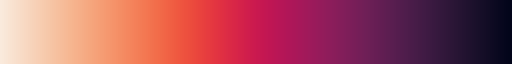

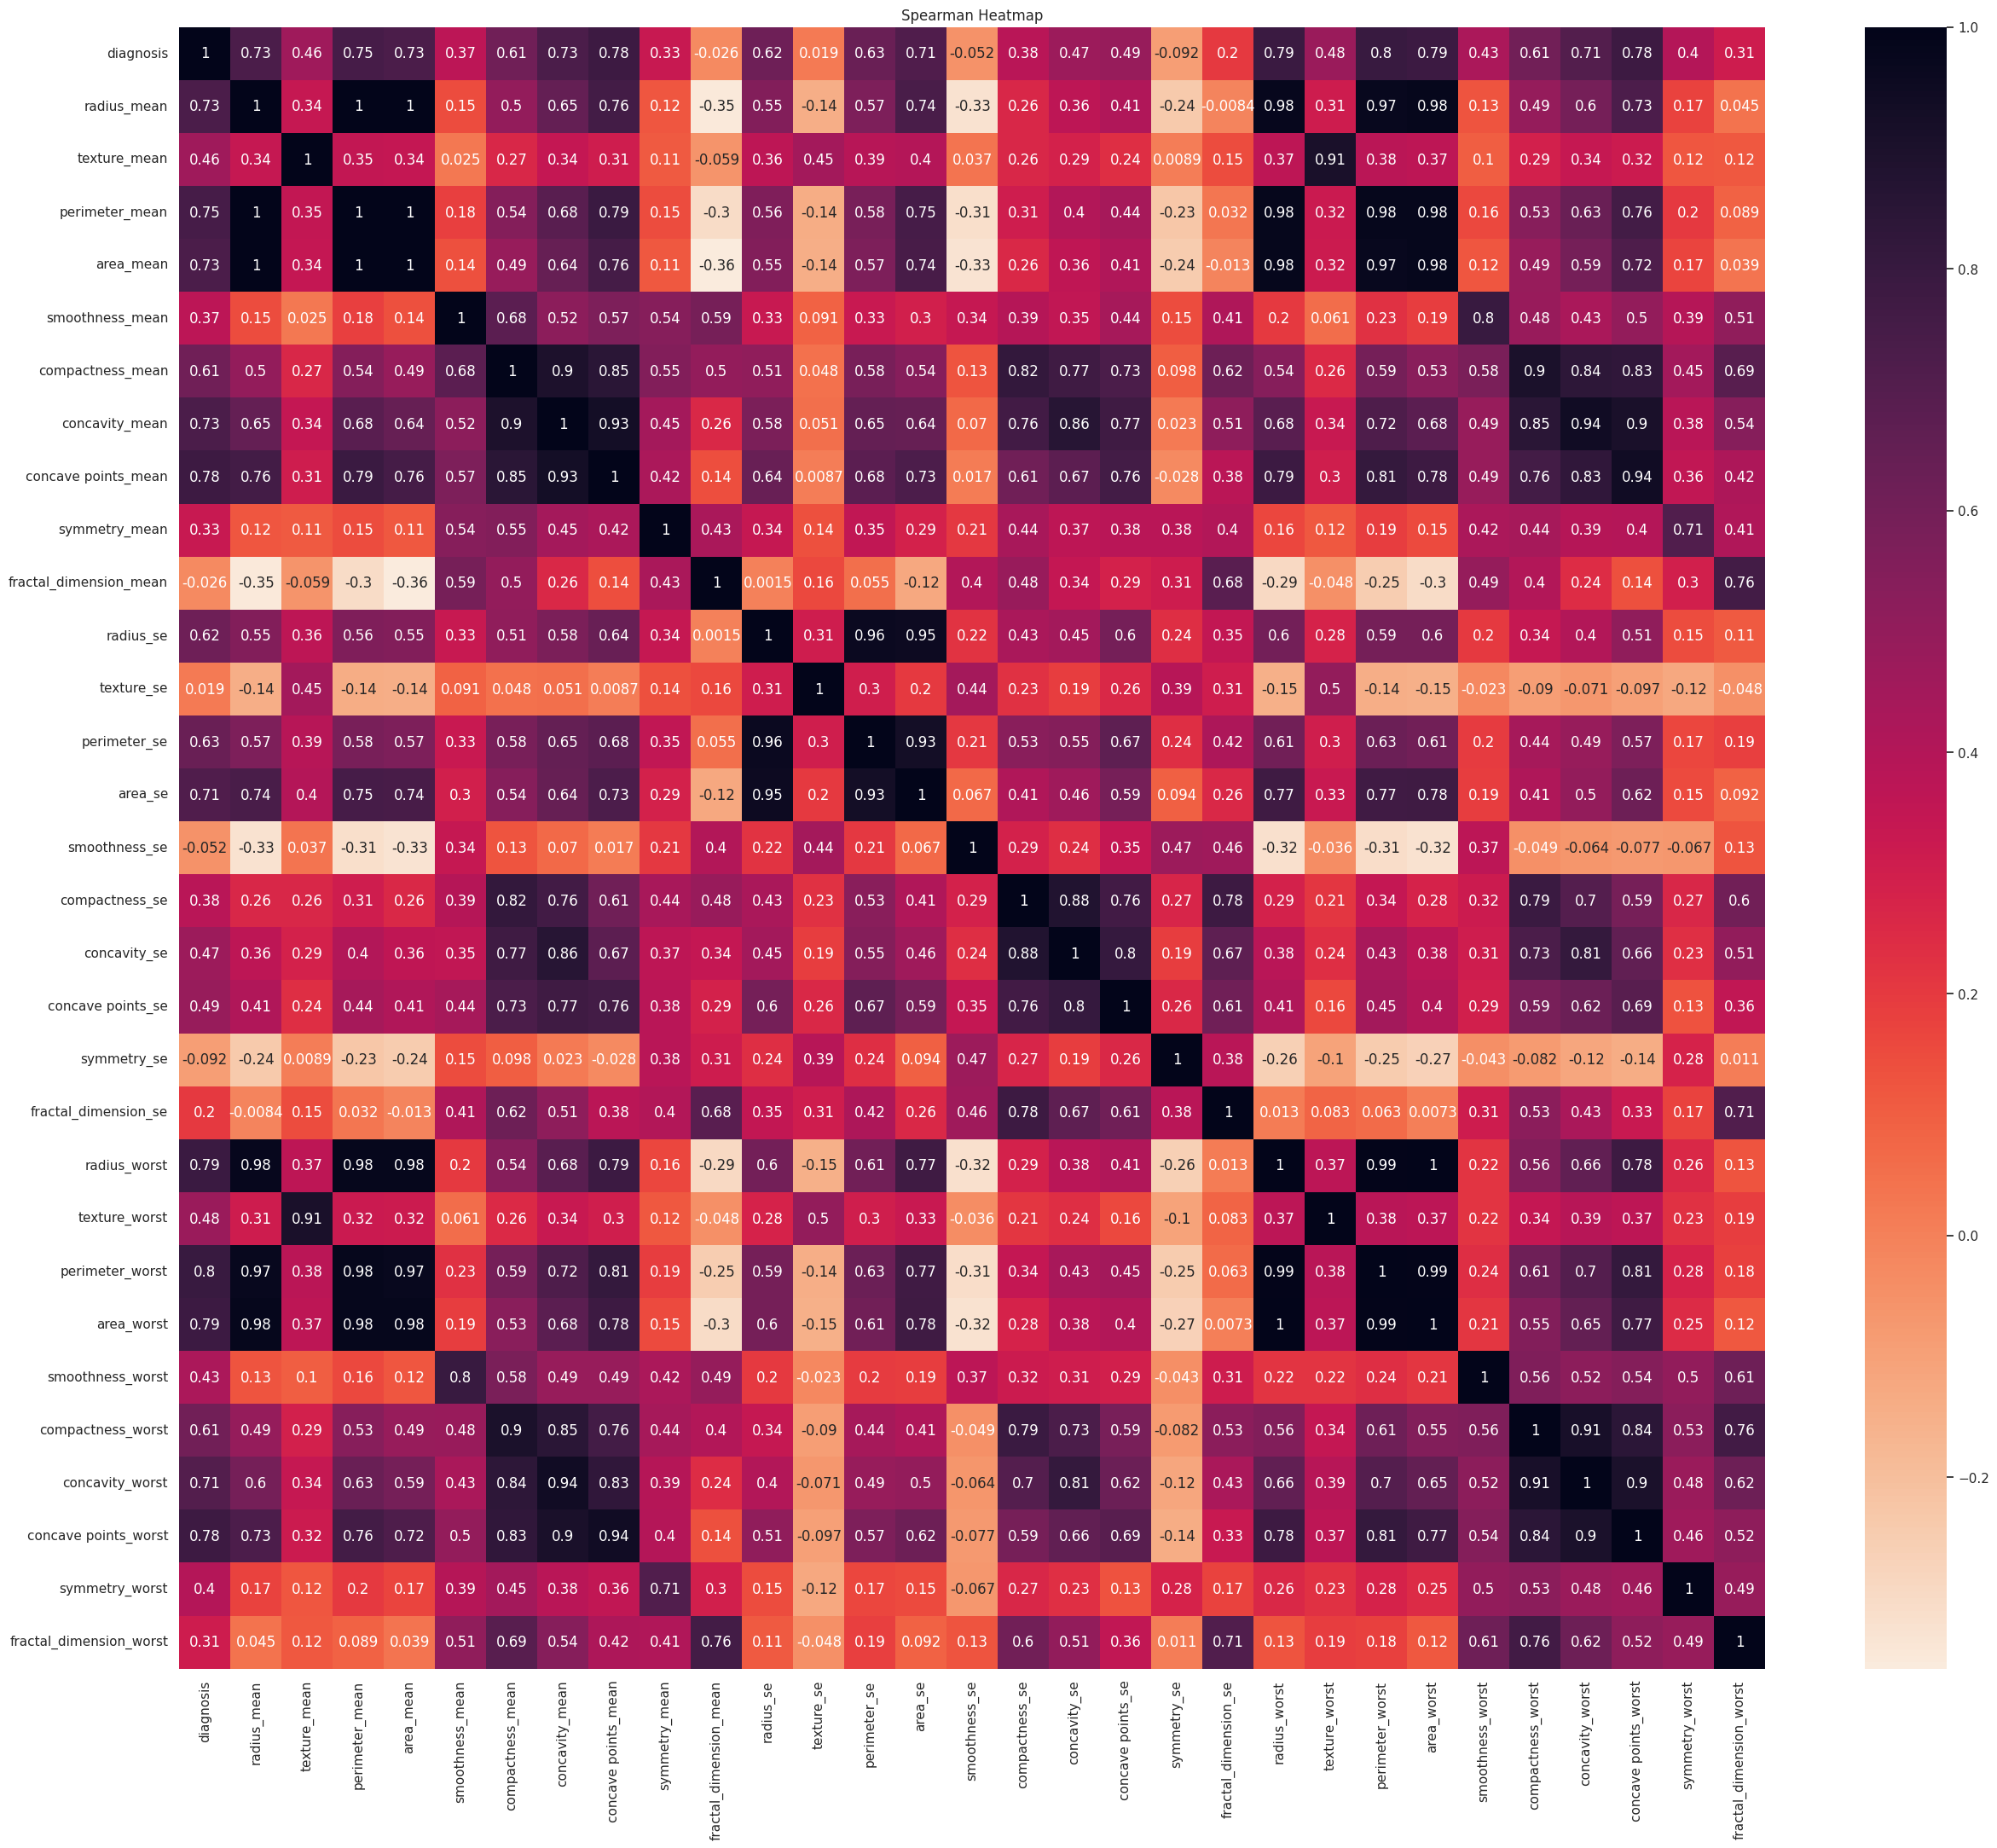

In [ ]:
sns.set(rc={'figure.figsize':(30, 25)})
sns.heatmap(correl, annot=True, cmap = "rocket_r").set(title='Spearman Heatmap')
sns.color_palette("rocket_r", as_cmap=True)

*Using the Spearman correlation algorithm, we can generate the heatmap shown above. The heatmap is quite extensive (you can zoom in by clicking on it) as it covers the entire dataset. It helps us understand which data is representative for us and which is not. The heatmap also helps find important dependencies and insights. For example, the 'diagnosis' column stands out, correlating at its highest value of 0.8 with the 'perimeter_worst' column. What does this mean? It means that changes in the 'perimeter_worst' column directly lead to changes in the 'diagnosis' column. The same applies to neighboring columns with values of 0.79 and slightly lower. Highly correlated data is a problem for us as it distorts the classification results in a negative way. Something needs to be done about this.*

*Based on the heatmap above, the dataset has been updated, and unnecessary highly correlated columns have been removed. Let's denote the following columns:*

In [ ]:
test = data
cols = ['perimeter_mean', 'area_mean', 'radius_mean', 'radius_worst',\
'perimeter_worst', 'area_worst']
test = test.drop(columns = cols)
test.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


*Going ahead, it can be said that removing correlated values does not give us a qualitative model; on the contrary, it worsens it. Therefore, I have come to the conclusion that it is worth using the Principal Component Analysis (PCA) method to reduce the dimensionality of the data and for a more visual exploration of their structure.*

Selection of the classification method and data tuning

Splitting the dataset into X_train, X_test, y_train, y_test, data_class

In [ ]:
X = data.iloc[: , 1:]
y = data[['diagnosis']]

*We split the dataset into two groups:*

*X - all data except the target variable.*

*y - the target variable.*

*Next, we divide the dataset into X_train, X_test, y_train, y_test.*

*We save the result to make it static with random_state=42.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*We will choose the test set size ratio with a value of 0.2, which means that the training set will constitute 80% of the dataset, and the test set will be 20%.*

*After experimenting with different parameters, the most stable ones were chosen, which are set now. The models give the best results when working with 3 PCA components (3 columns). Therefore, I will stick to the value n_components = 3.*

In [ ]:
pca = PCA(n_components = 3)
pca_result_train = pca.fit_transform(X_train)
pca_result_test = pca.transform(X_test)

*Let's consider the first Logistic Regression model.*

In [ ]:
clf = LogisticRegression()
clf.fit(pca_result_train, y_train.values.ravel())

LogisticRegression()

In [ ]:
pred = clf.predict(pca_result_test)

In [ ]:
pred_d = clf.predict(pca_result_train)

*We get the result on the training set:*

In [ ]:
accuracy_score(y_train, pred_d)

0.9230769230769231

*We get the result on the test set:*

In [ ]:
accuracy_score(y_test, pred)

0.9736842105263158

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Let's display the ROC-AUC curve for a visual check on the first and second type errors. The more the curve covers the upper-left corner of the plot, the better the model classifies the data into categories. Our main goal is to avoid the first type error (False Positive).

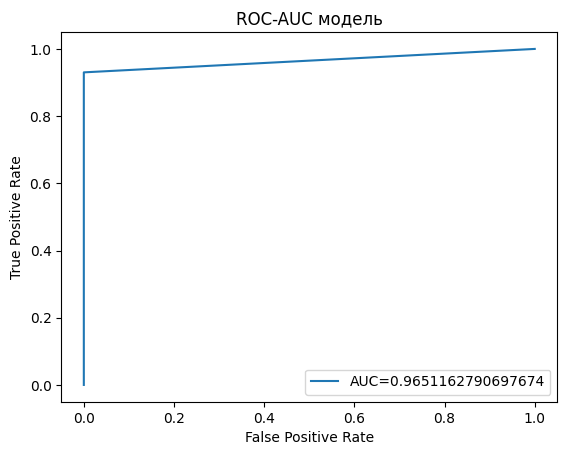

In [ ]:
auc = metrics.roc_auc_score(y_test, pred)
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC-AUC модель')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The model provides an excellent result for the ROC-AUC curve.

*However, there is a difference between the training and testing sets, which is not a big concern. I have double-checked it numerous times, and the result remains in the same range with minimal variations. Our final result on the testing set is impressive, with an accuracy of 0.97. Despite this, the model performs very well, and considering our context, this is the result we were looking for.*

*Let's explore the second model, Linear Discriminant Analysis (LDA).*

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(pca_result_train, y_train.values.ravel())

LinearDiscriminantAnalysis()

In [ ]:
pred = lda.predict(pca_result_test)

In [ ]:
pred_d = lda.predict(pca_result_train)

*We get the result on the training set:*

In [ ]:
accuracy_score(y_train, pred_d)

0.8747252747252747

*We get the result on the test set:*

In [ ]:
accuracy_score(y_test, pred)

0.9122807017543859

*On the training data, the model produces a terrible result, and this reflects on the test data as well. The result itself is not impressive; such a model is not suitable.*

*Let's consider the third classification model, the Random Forest.*

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(pca_result_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
pred = rfc.predict(pca_result_test)

In [ ]:
pred_d = rfc.predict(pca_result_train)

*Получаем результат на тренировочной выборке:*

In [ ]:
accuracy_score(y_train, pred_d)

1.0

*We get the result on the test set:*

In [ ]:
accuracy_score(y_test, pred)

0.956140350877193

*The model performs excellently on the training set; however, the test set disappoints.*

*The fourth model is the Gradient Boosting.*

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(pca_result_train, y_train.values.ravel())

GradientBoostingClassifier()

In [ ]:
pred = gbc.predict(pca_result_test)

In [ ]:
pred_d = gbc.predict(pca_result_train)

*Getting results on the training set:*

In [ ]:
accuracy_score(y_train, pred_d)

0.9978021978021978

*Getting results on the test set:*

In [ ]:
accuracy_score(y_test, pred)

0.9473684210526315

*The conclusion is very similar to the random forest, such a result does not suit us.*

**Conclusion**

*The analysis of cancer cell data showed that the classification of malignant cells depends most on the columns with the _worst designation. However, for accurate classification of benign and malignant cells, a certain threshold was needed. For this purpose, the Principal Component Analysis (PCA) method was used, which allowed us to understand the structure of the data and process it for further construction of a predictive classification model.

Based on the processed PCA data, 4 classification models were built, among which the best result (0.97) was shown by the logistic regression model, and the random forest model, with a result of (0.96), tried not to lag behind. In general, the data turned out to be extensive, sets of metrics were used for each observation, which in some way complicated the process. However, data processing using the PCA method significantly increased the efficiency of classification and helped find the optimal boundary for classification.*